# Prediction of Injury in the National Football League
Matthew McCarroll 04/22/2020

This notebook focuses on predicting injury in the National Football League.  The data used comes from a competion hosted by Kaggle (https://www.kaggle.com/c/nfl-playing-surface-analytics/overview).  The competition asked to investigate the relationship between the playing surface and the injury and performance of NFL athletes.  Instead, I wanted to investigate if there is a difference between a play where a player is injured as opposed to a play where a player is not, and if there is can we predict if a player will be injured.  The datasets located and are described at the following link https://www.kaggle.com/c/nfl-playing-surface-analytics/data.  First, I cleaned and visualzed the data. Next, I performed feature selection and extraction.  Third, I looked at relationships between the features and finally used those features in training a model to predict injury. 

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# see more columns and rows
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Read in the data.

In [3]:
InjuryRecord = pd.read_csv('InjuryRecord.csv')
PlayList = pd.read_csv('PlayList.csv')

Explore the Playlist dataset.

In [4]:
PlayList.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [5]:
print(PlayList['Weather'].unique())

['Clear and warm' 'Mostly Cloudy' 'Sunny' 'Clear' 'Cloudy'
 'Cloudy, fog started developing in 2nd quarter' 'Rain' 'Partly Cloudy'
 'Mostly cloudy' 'Cloudy and cold' 'Cloudy and Cool' 'Rain Chance 40%'
 'Controlled Climate' 'Sunny and warm' 'Partly cloudy' 'Clear and Cool'
 'Clear and cold' 'Sunny and cold' 'Indoor' nan 'Partly Sunny'
 'N/A (Indoors)' 'Mostly Sunny' 'Indoors' 'Clear Skies' 'Partly sunny'
 'Showers' 'N/A Indoor' 'Sunny and clear' 'Snow' 'Scattered Showers'
 'Party Cloudy' 'Clear skies' 'Rain likely, temps in low 40s.' 'Hazy'
 'Partly Clouidy' 'Sunny Skies' 'Overcast' 'Cloudy, 50% change of rain'
 'Fair' 'Light Rain' 'Partly clear' 'Mostly Coudy' '10% Chance of Rain'
 'Cloudy, chance of rain' 'Heat Index 95' 'Sunny, highs to upper 80s'
 'Sun & clouds' 'Heavy lake effect snow' 'Mostly sunny' 'Cloudy, Rain'
 'Sunny, Windy' 'Mostly Sunny Skies' 'Rainy' '30% Chance of Rain'
 'Cloudy, light snow accumulating 1-3"' 'cloudy' 'Clear and Sunny' 'Coudy'
 'Clear and sunny' 'Clear t

In [6]:
print(PlayList['StadiumType'].unique())

['Outdoor' 'Indoors' 'Oudoor' 'Outdoors' 'Open' 'Closed Dome'
 'Domed, closed' nan 'Dome' 'Indoor' 'Domed' 'Retr. Roof-Closed'
 'Outdoor Retr Roof-Open' 'Retractable Roof' 'Ourdoor'
 'Indoor, Roof Closed' 'Retr. Roof - Closed' 'Bowl' 'Outddors'
 'Retr. Roof-Open' 'Dome, closed' 'Indoor, Open Roof' 'Domed, Open'
 'Domed, open' 'Heinz Field' 'Cloudy' 'Retr. Roof - Open'
 'Retr. Roof Closed' 'Outdor' 'Outside']


There are many different values associated with weather and stadium type.  To make these columns more readable, a mapping will be applied to both.  There will be five categories for weather: Clear, Cloudy, Rain, and Snow, and two categories for StadiumType: Indoors and Outdoors.

In [7]:
weather_info={'Clear and warm':'Clear',
         'Mostly Cloudy':'Cloudy',
         'Sunny':'Clear',
         'Clear':'Clear',
         'Cloudy':'Cloudy',
         'Cloudy, fog started developing in 2nd quarter':'Cloudy',
         'Rain':'Rain',
         'Partly Cloudy':'Cloudy',
         'Mostly cloudy':'Cloudy',
         'Cloudy and cold':'Cloudy',
         'Cloudy and Cool':'Cloudy',
         'Rain Chance 40%':'Rain',
         'Controlled Climate':'Clear',
         'Sunny and warm':'Clear',
         'Partly cloudy':'Cloudy', 
         'Clear and Cool':'Clear',
         'Clear and cold':'Clear',
         'Sunny and cold':'Clear',
         'Indoor':'Clear',
         'Partly Sunny':'Clear',
         'N/A (Indoors)':'Clear',
         'Mostly Sunny':'Clear',
         'Indoors':'Clear',
         'Clear Skies':'Clear',
         'Partly sunny':'Clear',
         'Showers':'Rain', 
         'N/A Indoor':'Clear',
         'Sunny and clear':'Clear',
         'Snow':'Snow',
         'Scattered Showers':'Rain',
         'Party Cloudy':'Cloudy',
         'Clear skies':'Clear',
         'Rain likely, temps in low 40s.':'Rain',
         'Hazy':'Cloudy', 
         'Partly Clouidy':'Cloudy',
         'Sunny Skies':'Clear',
         'Overcast':'Cloudy',
         'Cloudy, 50% change of rain':'Rain',
         'Fair':'Clear',
         'Light Rain':'Rain',
         'Partly clear':'Clear',
         'Mostly Coudy':'Cloudy',
         '10% Chance of Rain':'Rain',
         'Cloudy, chance of rain':'Cloudy',
         'Heat Index 95':'Clear',
         'Sunny, highs to upper 80s':'Clear',
         'Sun & clouds':'Cloudy',
         'Heavy lake effect snow':'Snow',
         'Mostly sunny':'Clear',
         'Cloudy, Rain':'Rain',
         'Sunny, Windy':'Clear',
         'Mostly Sunny Skies':'Clear',
         'Rainy':'Rain',
         '30% Chance of Rain':'Rain',
         'Cloudy, light snow accumulating 1-3"':'Snow',
         'cloudy':'Cloudy',
         'Clear and Sunny':'Clear',
         'Coudy':'Cloudy', 
         'Clear and sunny':'Clear',
         'Clear to Partly Cloudy':'Cloudy',
         'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.':'Rain',
         'Rain shower':'Rain',
         'Cold':'Clear'}
# map function
PlayList['Weather_category']=PlayList['Weather'].map(weather_info)

In [8]:
Stadium_info={'Outdoor':'Outdoors',
              'Indoors':'Indoors',
              'Oudoor':'Outdoors',
              'Outdoors':'Outdoors',
              'Open':'Outdoors',
              'Closed Dome':'Indoors',
              'Domed, closed':'Indoors',
              'Dome':'Indoors',
              'Indoor':'Indoors',
              'Domed':'Indoors',
              'Retr. Roof-Closed':'Indoors',
              'Outdoor Retr Roof-Open':'Indoors',
              'Retractable Roof':'Indoors',
              'Ourdoor':'Outdoors',
              'Roof Closed':'Indoors',
              'Retr. Roof - Closed':'Indoors',
              'Bowl':'Outdoors',
              'Outddors':'Outdoors',
              'Retr. Roof-Open':'Indoors',
              'Dome, closed':'Indoors',
              'Indoor, Open Roof':'Indoors',
              'Domed, Open':'Indoors',
              'Domed, open':'Indoors',
              'Heinz Field':'Outdoors',
              'Cloudy':'Outdoors',
              'Retr. Roof - Open':'Indoors',
              'Retr. Roof Closed':'Indoors',
              'Outdor':'Outdoors',
              'Outside':'Outdoors'}
# map function
PlayList['Stadium']=PlayList['StadiumType'].map(Stadium_info)

Certain assumptions are made to fill te remaining missings  stadium and weather values.  If weather is NaN and the stadium is Indoors, then weather category will be clear.  If Stadium is NaN and the weather is ,bad (rain or snow), then Stadium category will be Outdoors.  It is a coin flip in this assumption really. Observation shows that some temperatre values are -999. The assumption made is if temperature is <0, the stadium is indoors and the temperature is  set to 68 degrees.

In [9]:
mask = (PlayList['Stadium'] == 'Indoors') & (PlayList['Weather'].isna())
PlayList.loc[mask,'Weather_category']='Clear'

mask = (PlayList['Weather_category']=='Rain') & (PlayList['Stadium'].isna())
PlayList.loc[mask,'Stadium']='Outdoors'

mask = (PlayList['Weather_category']=='Snow') & (PlayList['Stadium'].isna())
PlayList.loc[mask,'Stadium']='Outdoors'

mask = (PlayList['Temperature']<0)
PlayList.loc[mask,'Temperature']=68
PlayList.loc[mask,'Stadium']='Indoors'

PlayList = PlayList.drop(['Weather','StadiumType'], axis=1)
# PlayList.to_csv('PlayList_mod.csv', index=False)

In [10]:
PlayList.loc[PlayList.isna().any(axis=1)].shape

(19184, 14)

After cleaning there are still ~20000 missing values.  These will be evalulated later.

Now I explore InjuryRecord dataset.  By looking for missing values, we see that the PlayKey information is mssing for many entries.

In [11]:
print(InjuryRecord[InjuryRecord.isna().any(axis=1)].shape)
InjuryRecord[InjuryRecord.isna().any(axis=1)].head()

(28, 9)


,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
46,33337,33337-2,NaN,Foot,Natural,1,1,1,1
47,45099,45099-5,NaN,Knee,Natural,1,1,1,1
48,36591,36591-9,NaN,Knee,Natural,1,1,1,1
49,45950,45950-6,NaN,Toes,Synthetic,1,1,0,0
50,39653,39653-4,NaN,Ankle,Synthetic,1,0,0,0


These NaNs will be filled by comparing GameIDs with the Playlist dataset.

In [12]:
# get index of missing values in InjuryRecord
idx_missng=InjuryRecord[InjuryRecord.isna().any(axis=1)].index
import warnings
warnings.filterwarnings('ignore')
for i in idx_missng:
    last_play=PlayList[PlayList['GameID']==InjuryRecord['GameID'].iloc[i]]['PlayKey'].iloc[-1]
    InjuryRecord['PlayKey'].iloc[i]=last_play    

Days injured was assessed to see what were the lengths of injuries.

In [13]:
days_injured = ['DM_M1','DM_M7','DM_M28','DM_M42']
InjuryRecord['DM_Tally_sum']=InjuryRecord[days_injured].sum(axis=1)
DM_length = {1:'1-7',2:'8-28',3:'29-42',4:'>42'}
InjuryRecord['DM']=InjuryRecord['DM_Tally_sum'].map(DM_length)

The InjuryRecord dataset will be merged with the Playlist dataset.  Merging is based on the InjuryRecord PlayKey.

In [14]:
ir_pl=pd.merge(InjuryRecord,PlayList,on='PlayKey',suffixes=['_Inj','_PL'],how='left')

ir_pl=ir_pl.drop(['PlayerKey_PL','GameID_PL'],axis=1)
ir_pl.rename(columns={'PlayerKey_Inj':'PlayerKey','GameID_Inj':'Game_ID'}, inplace=True)

ir_pl=ir_pl.reset_index(drop=True)
mask = (ir_pl['PlayKey']=='47285-4-16')# specific event that needed to be addressed
ir_pl.loc[mask,'Stadium'] = 'Outdoors'
ir_pl.loc[mask,'Weather_category'] = 'Clear'

idx_missng=ir_pl[ir_pl.isna().any(axis=1)].index # cleaning up final loose ends
ir_pl.loc[idx_missng,'Weather_category']='Cloudy'
ir_pl.loc[idx_missng,'Stadium']='Indoors'

# ir_pl.to_csv('ir_pl.csv', index=False)


There is now a dataset that holds more detail on the injured players than what was provided.

# Data Visualizations

An overview of the injuries recorded can be seen.

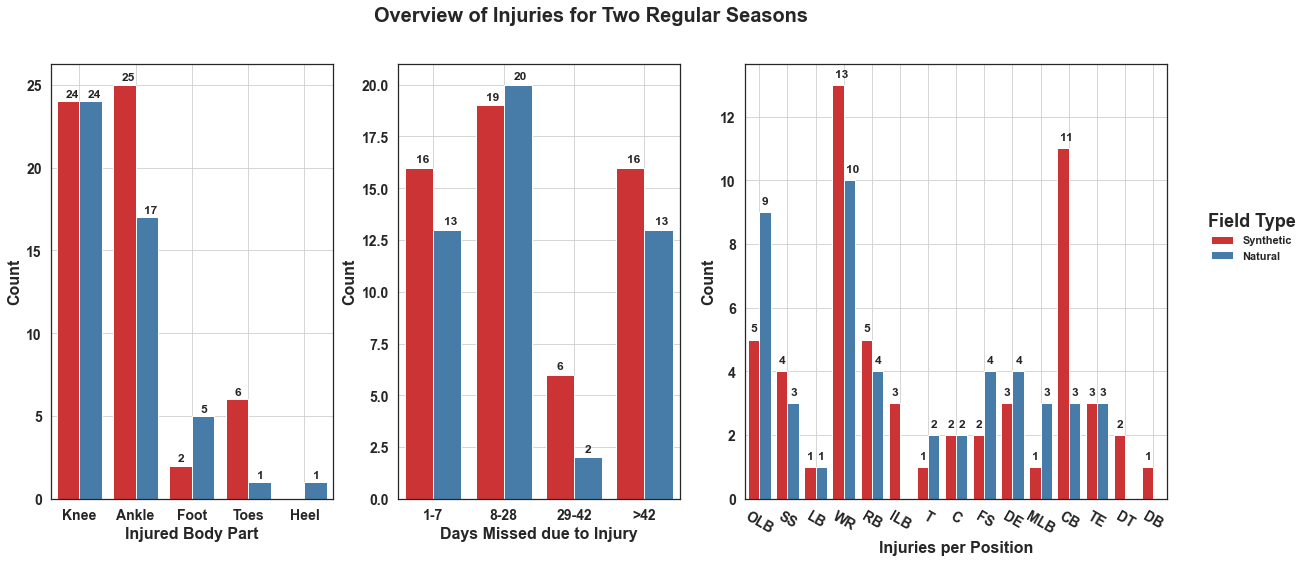

In [15]:
sns.set(style="white") 
fontlabelsize=16
fontbold='bold'
fontticksize=14
from matplotlib import gridspec
fig = plt.figure(figsize=(20,8))

sup_title=fig.suptitle('Overview of Injuries for Two Regular Seasons',fontsize=20, fontweight='bold')
gs = gridspec.GridSpec(1, 3, width_ratios=[2,2,3]) 


ax1= plt.subplot(gs[0])
sns.countplot(x='BodyPart', hue='Surface', orient='h',data=ir_pl, palette='Set1')
ax1.set_xlabel('Injured Body Part',fontsize=fontlabelsize,fontweight=fontbold)
ax1.set_ylabel('Count',fontsize=fontlabelsize,fontweight=fontbold)
ax1.grid(b=True,which='major', linewidth=.8)
ax1.grid(b=True,which='minor', linewidth=.3)
ax1.set_axisbelow(True)
ax1.legend_.remove()

for tick in ax1.xaxis.get_ticklabels():
    tick.set(rotation=0)
    tick.set_fontsize(fontticksize)
    tick.set_fontweight('bold')
for tick in ax1.yaxis.get_ticklabels():
    tick.set_fontsize(fontticksize)
    tick.set_fontweight('bold')
                     
for p in ax1.patches:
    ax1.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+.25),fontweight='bold')        

ax2= plt.subplot(gs[1])
sns.countplot(x='DM',order=['1-7','8-28','29-42','>42'], orient='h', hue='Surface',data=ir_pl, palette='Set1')
ax2.set_xlabel('Days Missed due to Injury', fontsize=fontlabelsize,fontweight=fontbold)
ax2.set_ylabel('Count',fontsize=fontlabelsize,fontweight=fontbold)
ax2.grid(b=True,which='major', linewidth=.8)
ax2.grid(b=True,which='minor', linewidth=.3)
ax2.set_axisbelow(True)
ax2.legend_.remove()

for tick in ax2.xaxis.get_ticklabels():
    tick.set(rotation=0)
    tick.set_fontsize(fontticksize)
    tick.set_fontweight('bold')
for tick in ax2.yaxis.get_ticklabels():
    tick.set_fontsize(fontticksize)
    tick.set_fontweight('bold')

for p in ax2.patches:
    ax2.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+.25),fontweight='bold')


ax3= plt.subplot(gs[2])
sns.countplot(x='Position', hue='Surface', orient='h',data=ir_pl, palette='Set1')
ax3.set_xlabel('Injuries per Position',fontsize=fontlabelsize,fontweight=fontbold)
ax3.set_ylabel('Count',fontsize=fontlabelsize,fontweight=fontbold)
ax3.grid(b=True,which='major', linewidth=.8)
ax3.grid(b=True,which='minor', linewidth=.3)
ax3.set_axisbelow(True)
ax3.legend_.remove()

for tick in ax3.xaxis.get_ticklabels():
    tick.set(rotation=-30)
    tick.set_fontsize(fontticksize)
    tick.set_fontweight('bold')
for tick in ax3.yaxis.get_ticklabels():
    tick.set_fontsize(fontticksize)
    tick.set_fontweight('bold')
                     
for p in ax3.patches:
    ax3.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+.25),fontweight='bold')        

legend_properties = {'weight':'bold'}
   
bbox = (fig.subplotpars.left+.8, fig.subplotpars.top-.35, fig.subplotpars.right-fig.subplotpars.left-.745,.1)
ax3.legend(bbox_to_anchor=bbox, loc='lower left', ncol=1, borderaxespad=0., bbox_transform=fig.transFigure,
           fontsize=16,frameon=False,title='Field Type',title_fontsize=18,prop=legend_properties)
ax3.get_legend().get_title().set_fontweight('bold')

# plt.savefig('days_injured.png',bbox_inches='tight')
plt.show()

The injuries are mostly knee and ankle.  Days missed is interesting.  It shows that either an injury clears up in 1-4 weeks or the player is injured for the whole season (>42 days~>6 weeks).  Strikingly, outside linebacks (OLB), cornerbacks (CB) and wide receivers (WR).   Another plot is created to view injuries to specific positions.

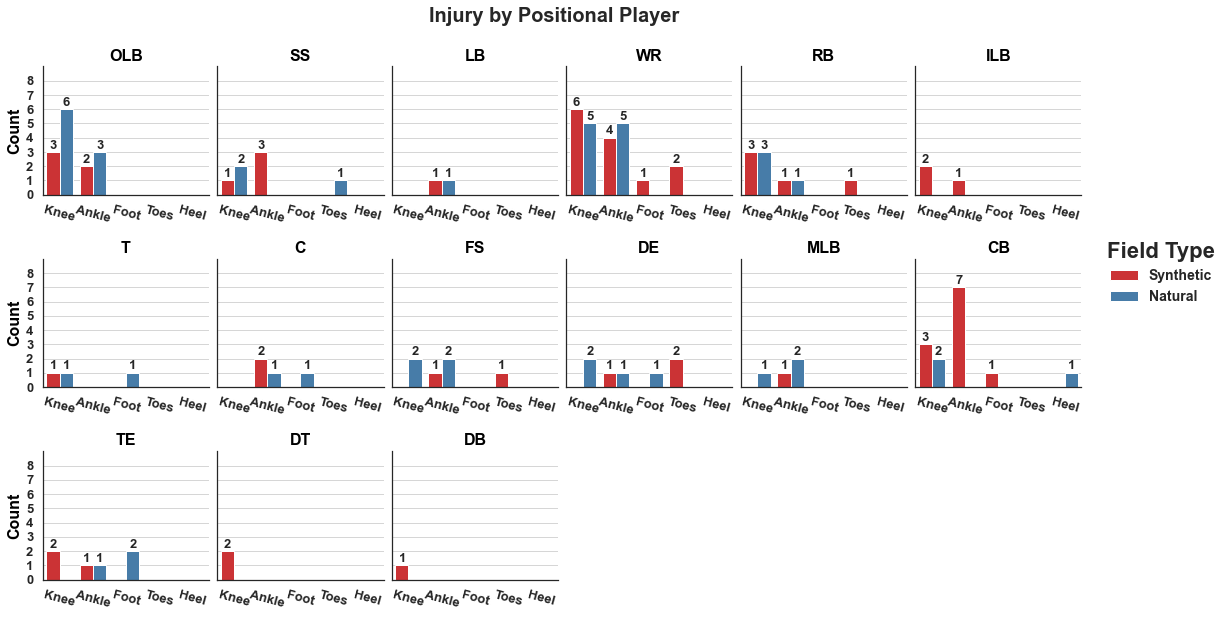

In [16]:
# set seaborn figure aesthetics
sns.set(style="white")
# set font tick size
fontticksize=13
# set dictionary for labeling x, y, and title
font = {'color':  'black',
        'weight': 'bold',
        'size': 16}

# use seaborn catplot function to show counts of categorical data

cat_plot=sns.catplot(x='BodyPart',hue='FieldType', col='Position', data=ir_pl, palette='Set1', height=2.5, aspect=1,
                     col_wrap=6, kind='count',sharey=True,sharex=False,legend=False, legend_out=False)


# create list of position names that will be used for individual titles 
position_names = ir_pl['Position'].unique()

# call each plot from the sns.catplot function
for i, ax in enumerate(cat_plot.axes):
    
    ax.set_title(position_names[i],fontdict=font) # set title    
    ax.set_ylim(0,9) # set y limits
    ax.set_yticks(np.arange(0,9,1)) # set number of y ticks
    ax.set_xlabel('') # set x label
    
    # call the tick labels of the x and y axes
    for tick in ax.xaxis.get_ticklabels():
        tick.set(rotation=-15) # set tick rotation
        tick.set_fontsize(fontticksize) # set tick font size
        tick.set_fontweight('bold') # set tick font weight
    for tick in ax.yaxis.get_ticklabels():
        tick.set_fontsize(fontticksize)
        tick.set(rotation=0)
        tick.set_fontweight('bold')
    
    # put labels on top of bar that represents the count.  Adjust x-axis and height here (follow the arrows)
    #                                                              |                  |
    for p in ax.patches: #                                         V                  V
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+.25),fontsize=fontticksize, fontweight='bold')
        
    # set the major y axis grid to specific linewidth
    ax.grid(b=True,which='major',axis='y', linewidth=.8)
    # bring the bars to be in front of the gridlines for better visibility
    ax.set_axisbelow(True)

    
# changing aesthetics of the overall figure now.

cat_plot.set_ylabels('Count',fontdict=font)
# assign the overall cat_plot figure 
fig=cat_plot.fig
# adjst space between the individual plots
fig.subplots_adjust(bottom=0.0, hspace=0.5, wspace=0.05)
# add a title that is centered over the figure
sup_title= fig.suptitle('Injury by Positional Player',fontsize=20,fontweight='bold')
# adjst the space between title and plot
sup_title.set_y(1.06)

# assign legend properties
legend_properties = {'weight':'bold','size':14}
# assign location of where the legend will be placed.  Change vaules to shift legend
x_shift = 0.98
y_shift = 0.45
bbox = (fig.subplotpars.left+x_shift, fig.subplotpars.top-y_shift, fig.subplotpars.right-fig.subplotpars.left,.1)
# assign legened to figureusing bbox coordinates
ax.legend(bbox_to_anchor=bbox, loc='lower left', ncol=1, borderaxespad=0., bbox_transform=fig.transFigure,
                   frameon=False,title='Field Type',prop=legend_properties)

# set font weight and font size of the legend title
ax.get_legend().get_title().set_fontweight('bold')
ax.get_legend().get_title().set_fontsize(22)


# plt.savefig('position_injury.png',bbox_inches='tight',dpi=160)

plt.show()

It is clear that a large number of CBs and WRs were injured.  Cornerbacks and wide recievers are similiar in play movement as they mosly cover each other.  There are 70 players that are labeled as CB or WR.  Of those 70, 37 were injured (>50%). This information is what drives the quesion can I predict injury to CBs and or WRs given ther NGS?  Their information PlayerKey is going to be used to collect all their NGS from the PlayTrackData dataset. The PlayTrackData is very large so I will read the data in chunks.

In [ ]:
# finding CB WR NGS by parsing through PlayerTrackData.
j=0
tot=0
CB_WR_plays=pd.DataFrame()
chunks=4000000

mask = (PlayList['Position']=='CB') | (PlayList['Position']=='WR')
cb_wr_id=PlayList.loc[mask,'PlayerKey'].unique().astype('int')

for batch in pd.read_csv('PlayerTrackData.csv',iterator=True, chunksize=chunks):
    j=j+1
    tot=tot+len(batch)
#     print(j)
    batch['PlayerKey']=batch['PlayKey'].apply(lambda x: x.split('-')[0]).astype('int')
    
    for idx, ID in enumerate(list(cb_wr_id)):
        grab=batch.loc[batch['PlayerKey']==ID]
        CB_WR_plays=CB_WR_plays.append(grab)
#     if j==5:
#         break

CB_WR_plays['GameID']=CB_WR_plays['PlayKey'].apply(lambda x: x.split('-')[1]).astype('int')
CB_WR_plays['PlayerGame']=CB_WR_plays['PlayKey'].apply(lambda x: x.split('-')[2]).astype('int')

CB_WR_plays=CB_WR_plays.reset_index(drop=True)
idx=CB_WR_plays.loc[(CB_WR_plays['PlayerKey'] == 46134) & (CB_WR_plays['GameID'] < 11)].index # this player did not play cornerback until game 11.
CB_WR_plays=CB_WR_plays.drop(idx,axis=0)

# CB_WR_plays.to_csv('CB_WR_plays.csv', index=False)

In [17]:
# read in previously made datasets
InjuryRecord = pd.read_csv('InjuryRecord.csv')
PlayList = pd.read_csv('PlayList_mod.csv')
CB_WR_plays=pd.read_csv('CB_WR_plays.csv')
ir_pl=pd.read_csv('ir_pl.csv')
# CB_WR_plays.shape

Clearly there are many more plays where CBs and WRs are not injured than those that are.  Because of this, I will pick plays at random that the player did not suffer an injury.

In [22]:
cols=['PlayerKey','Position','PlayerGame','PlayerGamePlay','PlayKey','FieldType','PlayType','Weather_category','Temperature','Stadium']
mask = (ir_pl['Position']=='CB') | (ir_pl['Position']=='WR')
cb_wr_injured = ir_pl[mask][cols]
cb_wr_injured['Status'] = 'Injured'
# print(cb_wr_injured.shape)

cb_wr_inj_playkey = cb_wr_injured['PlayKey'].unique()
mask = (PlayList['Position']=='CB') | (PlayList['Position']=='WR') & (PlayList['Stadium'].notnull()) & (PlayList['Weather_category'].notnull())
cb_wr_all = PlayList[mask][cols]

# create mask that holds index of only healthy plays
mask = (cb_wr_all['Stadium'].notnull()) & (cb_wr_all['Weather_category'].notnull())
cb_wr_all = cb_wr_all[mask][cols]
non_inj_index=cb_wr_all.loc[~cb_wr_all['PlayKey'].isin(cb_wr_inj_playkey)].index

cb_wr_healthy=cb_wr_all.loc[non_inj_index].sample(n=185, random_state=111) # pick 185 random plays.  Injured plays make up 1/5 of the total plays used in this analysis
cb_wr_healthy['Status'] = 'Healthy'
# print(cb_wr_healthy.shape)

data=pd.concat([cb_wr_injured,cb_wr_healthy]).reset_index(drop=True)
data.shape
# 37*8

(222, 11)

Below is a visualization of a specific play that was recorded using the ngs data.  Player (x,y) position on the field, speed, orientation, and direction was given.  I plottd the ngs data and added play info and event to he graph.  

I myself made calculations that allowed me to plot the change in speed and direction from basline.  More of these graphs and the code to make them can be found in the repository.

<img src="43532-5-69_play_movements.png">


More of these plots can be found in the github repository.  Observations shows player orienation is not reliable and not well defined via the kaggle description of the data.  I wanted to investigate if the change in speed and direction played a role in injuries. Perhaps abrupt changes in these give way to injuries in players.  

Here I perform feature selection and feature extraction to create a dataset that will be used for machine learning.  From the NGS provided, I select the max speed, total distance traveled.  I also calculate the average change in direction, the standard deviation in change in direction, the total number of changes in direction value above 2.5 stds, the max value change in direction, and the max value change in speed.

In [23]:
data_playkey = data['PlayKey'].unique()
gg=[]
for pt, play in enumerate(data_playkey):
    mask = (CB_WR_plays['PlayKey']==play)

    cb_wr_play = CB_WR_plays[mask].reset_index()
    cb_wr_play[cb_wr_play['event'].notnull()]
    idx=cb_wr_play[cb_wr_play['event'].notnull()].index+30 # 
    mask= (cb_wr_play.index<=idx[-1]) # evaluate all  ngs up until 3 seconds after the last recorded event 
    cb_wr_play=cb_wr_play[mask]
    
    metrics=[]
    for idx, step in enumerate(cb_wr_play['dir']):
        if cb_wr_play['dir'].iloc[idx+1]<90 and cb_wr_play['dir'].iloc[idx]>250:
            d_dir=cb_wr_play['dir'].iloc[idx+1]+(360-cb_wr_play['dir'].iloc[idx])

        elif cb_wr_play['dir'].iloc[idx+1]>250 and cb_wr_play['dir'].iloc[idx]<90:
            d_dir=-(cb_wr_play['dir'].iloc[idx]+(360-cb_wr_play['dir'].iloc[idx+1]))
        else:
            d_dir=cb_wr_play['dir'].iloc[idx+1]-cb_wr_play['dir'].iloc[idx]
            
            
        metrics.append((cb_wr_play['time'].iloc[idx+1],
                        cb_wr_play['event'].iloc[idx],
                        cb_wr_play['time'].iloc[idx+1]-cb_wr_play['time'].iloc[idx],                    
                        d_dir,
                        cb_wr_play['dis'].iloc[idx+1]-cb_wr_play['dis'].iloc[idx],
                        cb_wr_play['o'].iloc[idx+1]-cb_wr_play['o'].iloc[idx],
                        cb_wr_play['s'].iloc[idx+1]-cb_wr_play['s'].iloc[idx]))
        
        if idx==len(cb_wr_play['dir'])-2:
            break

            
    df=pd.DataFrame(metrics,columns=('time','event','delta_time','delta_direction','delta_distance','delta_orient','delta_speed'))
    
    a=cb_wr_play['s'].max() # max speed
    b=cb_wr_play['dis'].abs().sum() # total distance traveled
    c=df['delta_direction'].abs().mean() # average change in direction
    d=df['delta_direction'].abs().std() # standard deviation in change in direction
    e=df[df['delta_direction'].abs()>(2.5*d)]['delta_direction'].count() # total number of changes in direction value above 2.5 stds.
    f=df['delta_direction'].abs().max() # max value change in direction
    g=df['delta_speed'].abs().max() # max value change in speed
    
    # looking to see if max delta speed and/or max delta direction take place within one second of an event
    h=np.array(df.loc[df['delta_speed'].abs()==g].index) 
    i=np.array(df.loc[df['delta_direction'].abs()==f].index)
    j=np.array(df.loc[df['event'].notnull()].index)
    delta_t_s_d=0
    delta_t_event_d=0
    delta_t_event_s=0
    for pt2 in h:
        pp2=(np.abs(pt2-i)<10).sum()
        delta_t_s_d=delta_t_s_d+pp2

    for pt3 in j:
        pp3=(np.abs(pt3-i)<10).sum()
        delta_t_event_d=delta_t_event_d+pp3

        pp4=(np.abs(pt3-h)<10).sum()
        delta_t_event_s=delta_t_event_s+pp4


    gg.append((play,a,b,c,d,e,f,g,delta_t_s_d,delta_t_event_d,delta_t_event_s))#,h,i,j))
    

ngs_stats=pd.DataFrame(gg,columns=('PlayKey','max_speed','distance_traveled','avg_delta_dir','std_delta_dir',
                                   'dir_cuts','max_delta_direction','max_delta_speed','delta_t_s_d','delta_t_event_d','delta_t_event_s'))


In [ ]:
ngs_stats.head()

In [24]:
features=pd.merge(data,ngs_stats,on='PlayKey',how='left')
features.head()
features[features.isna().any(axis=1)]
features=features.drop(['PlayerKey','Position','PlayKey'],axis=1)
features.to_csv('features.csv',index=False)
features.head()

,PlayerGame,PlayerGamePlay,FieldType,PlayType,Weather_category,Temperature,Stadium,Status,max_speed,distance_traveled,avg_delta_dir,std_delta_dir,dir_cuts,max_delta_direction,max_delta_speed,delta_t_s_d,delta_t_event_d,delta_t_event_s
0,5,69,Synthetic,Kickoff,Cloudy,89,Indoors,Injured,4.73,26.93,4.493593,7.024295,7,55.95,0.27,0,0,2
1,8,40,Synthetic,Pass,Clear,68,Outdoors,Injured,4.99,22.52,3.624797,4.428082,10,29.01,0.33,0,1,0
2,2,38,Synthetic,Pass,Clear,68,Indoors,Injured,6.38,32.67,3.218268,5.297176,10,32.70,0.41,0,0,0
3,2,13,Synthetic,Kickoff,Cloudy,68,Indoors,Injured,9.42,66.24,4.387508,14.308021,5,181.96,0.46,0,0,1
4,5,23,Synthetic,Kickoff,Cloudy,76,Indoors,Injured,7.75,42.20,4.318437,8.599630,3,86.82,0.36,0,0,2


XGBOOST was selected as the algorithm to train a model to predict injury.  One hot encoding was performed on categorical data to turn it into numeric.  The data was standardized, and split into train test sets (70/30).  Validation of the model was performed and analyzed. 

In [8]:
# turn categorical to numeric!
# features=pd.read_csv('features.csv')

features=pd.get_dummies(features,prefix=['Type'],columns=['PlayType'])
features=pd.get_dummies(features,prefix=['Stadium'],columns=['Stadium'])
features=pd.get_dummies(features,prefix=['FieldType'],columns=['FieldType'])
features=pd.get_dummies(features,prefix=['Weather'],columns=['Weather_category'])

features['Status'] = features['Status'].apply(lambda x: 1 if x=='Injured' else 0) # turn target information from categorical to numeric
features=features.astype('float')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from xgboost import XGBClassifier, DMatrix

X, y = features[features.columns.drop('Status')], features['Status']
# xgboost does not need values to be normalized or put within a range value. 
# scaler = StandardScaler()
# import warnings
# warnings.filterwarnings('ignore')
# X[X.columns[:].tolist()] = scaler.fit_transform(X[X.columns[:].tolist()]) # keep X as a dataframe

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=21)

clf = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=3,
                    min_child_weight=3, gamma=0.2, subsample=0.5, colsample_bytree=1.0,
                    objective='binary:logistic', scale_pos_weight=1, seed=27)


eval_set=[(X_train, y_train), (X_test, y_test)]

clf.fit(X_train, y_train, eval_metric=['auc','logloss'], eval_set=eval_set, verbose=1)




y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]


[0]	validation_0-auc:0.581293	validation_0-logloss:0.649741	validation_1-auc:0.492481	validation_1-logloss:0.647971
[1]	validation_0-auc:0.645692	validation_0-logloss:0.6174	validation_1-auc:0.357143	validation_1-logloss:0.620649
[2]	validation_0-auc:0.662925	validation_0-logloss:0.584262	validation_1-auc:0.37406	validation_1-logloss:0.587547
[3]	validation_0-auc:0.762358	validation_0-logloss:0.561119	validation_1-auc:0.383459	validation_1-logloss:0.568014
[4]	validation_0-auc:0.770522	validation_0-logloss:0.540015	validation_1-auc:0.417293	validation_1-logloss:0.544061
[5]	validation_0-auc:0.778118	validation_0-logloss:0.520528	validation_1-auc:0.484962	validation_1-logloss:0.526762
[6]	validation_0-auc:0.829252	validation_0-logloss:0.500558	validation_1-auc:0.451128	validation_1-logloss:0.514685
[7]	validation_0-auc:0.848639	validation_0-logloss:0.484629	validation_1-auc:0.484962	validation_1-logloss:0.501206
[8]	validation_0-auc:0.86678	validation_0-logloss:0.466743	validation_1-auc

[71]	validation_0-auc:0.938776	validation_0-logloss:0.289875	validation_1-auc:0.526316	validation_1-logloss:0.45388
[72]	validation_0-auc:0.939456	validation_0-logloss:0.287527	validation_1-auc:0.522556	validation_1-logloss:0.456989
[73]	validation_0-auc:0.943537	validation_0-logloss:0.284532	validation_1-auc:0.518797	validation_1-logloss:0.457898
[74]	validation_0-auc:0.943991	validation_0-logloss:0.28374	validation_1-auc:0.533835	validation_1-logloss:0.459445
[75]	validation_0-auc:0.945125	validation_0-logloss:0.282052	validation_1-auc:0.503759	validation_1-logloss:0.465229
[76]	validation_0-auc:0.946032	validation_0-logloss:0.280574	validation_1-auc:0.492481	validation_1-logloss:0.465921
[77]	validation_0-auc:0.946712	validation_0-logloss:0.280611	validation_1-auc:0.492481	validation_1-logloss:0.465481
[78]	validation_0-auc:0.945578	validation_0-logloss:0.280546	validation_1-auc:0.5	validation_1-logloss:0.465292
[79]	validation_0-auc:0.945578	validation_0-logloss:0.28027	validation_

[141]	validation_0-auc:0.954195	validation_0-logloss:0.247251	validation_1-auc:0.432331	validation_1-logloss:0.513748
[142]	validation_0-auc:0.955556	validation_0-logloss:0.247115	validation_1-auc:0.43609	validation_1-logloss:0.510936
[143]	validation_0-auc:0.956463	validation_0-logloss:0.246472	validation_1-auc:0.424812	validation_1-logloss:0.513834
[144]	validation_0-auc:0.955782	validation_0-logloss:0.245605	validation_1-auc:0.413534	validation_1-logloss:0.518893
[145]	validation_0-auc:0.956689	validation_0-logloss:0.244952	validation_1-auc:0.421053	validation_1-logloss:0.519898
[146]	validation_0-auc:0.955556	validation_0-logloss:0.243821	validation_1-auc:0.421053	validation_1-logloss:0.516633
[147]	validation_0-auc:0.955782	validation_0-logloss:0.243714	validation_1-auc:0.424812	validation_1-logloss:0.514513
[148]	validation_0-auc:0.956009	validation_0-logloss:0.243184	validation_1-auc:0.421053	validation_1-logloss:0.515745
[149]	validation_0-auc:0.956009	validation_0-logloss:0.24

In [9]:

print("Accuracy is: {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision score is: {}".format(metrics.precision_score(y_test, y_pred)))
print("Recall score is: {}".format(metrics.recall_score(y_test, y_pred)))
print("F1 score is: {}".format(metrics.f1_score(y_test, y_pred)))
print("AUC Score is: {}".format(metrics.roc_auc_score(y_test, y_pred_proba)))

Accuracy is: 0.8222222222222222
Precision score is: 0.3333333333333333
Recall score is: 0.14285714285714285
F1 score is: 0.2
AUC Score is: 0.41353383458646614


The accuracy of the model is 82%.  That is not terrible, but what is concerning is the low precision, recall, and  collective F1 score.  As we can see, there is clear overfitting from the output summary. Training Area under the curve reaches approx .96 where testing says at chance.  A confusion matrix visually explains this.

Text(91.68, 0.5, 'predicted label')

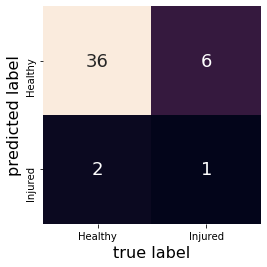

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, annot_kws={"fontsize":18}, fmt='d', cbar=False,
            xticklabels=['Healthy','Injured'],
            yticklabels=['Healthy','Injured'])
plt.xlabel('true label', Fontsize=16)
plt.ylabel('predicted label', Fontsize=16)

As we see above, predicted and true label healthy plays are good, but most of the injured plays are predicted as healthy plays.  Re-evaluation of this model can perhaps increase the predictive power.  Correlation analysis of the data, different feature engineering, or assigning weights to the categorical data may help in reducing overfitting.  Only after a solid model is put together will fine tuning be implemented.